# Data Loading

In [1]:
# Loading the Data
import pandas as pd
from configparser import ConfigParser

parser = ConfigParser()
_ = parser.read('notebook.cfg')

main_df = pd.read_csv(parser.get('database', 'main_database'))
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   songID            897 non-null    object 
 1   songTitle         897 non-null    object 
 2   SongArtistTitle   897 non-null    object 
 3   popularity        897 non-null    int64  
 4   danceability      897 non-null    float64
 5   energy            897 non-null    float64
 6   key               897 non-null    int64  
 7   loudness          897 non-null    float64
 8   mode              897 non-null    int64  
 9   speechiness       897 non-null    float64
 10  acousticness      897 non-null    float64
 11  instrumentalness  897 non-null    float64
 12  liveness          897 non-null    float64
 13  valence           897 non-null    float64
 14  tempo             897 non-null    float64
 15  type              897 non-null    object 
 16  id                897 non-null    object 
 1

# Feature Extraction
The feature extraction of this project is unlike a regular machine learning problems. In this case, there is no "target value" which sets as a tuning parameter for the training phase.

Rather than comparing the effectiveness of the features in regards to the result (which in this case there are none), we will take the correlation between the values within of each feature space, and rank them in order, ranking them from the feature with the least variance.

With this in mind, the initial **assumption** is that user has this similarities in picking their songs inside their playlist. The features that share the least variance will be the main parameter to pick the song recommendation inside their **genre bubble**.

/var/folders/m7/zdxv2v7533n6g6x152zvnktm0000gn/T/ipykernel_56785/307715778.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = main_df.corr()


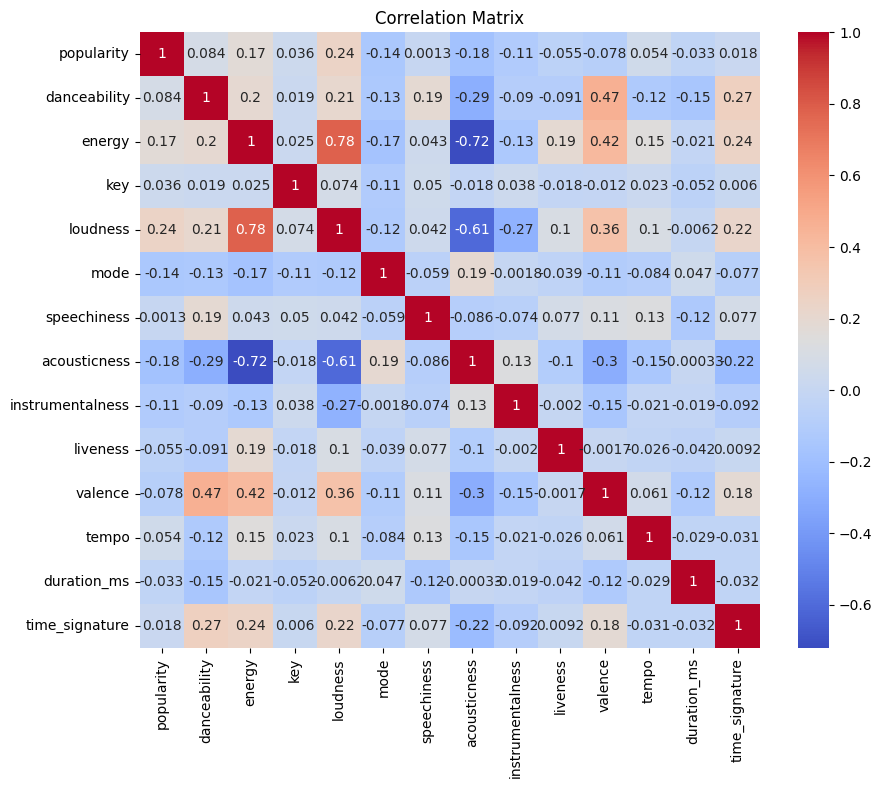

In [2]:
# Feature extraction using Correlation Matrix (Pearson)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the correlation matrix
correlation_matrix = main_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

# First Method: Music Recommendation with post-processed data

In [8]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   songID            897 non-null    object 
 1   songTitle         897 non-null    object 
 2   SongArtistTitle   897 non-null    object 
 3   popularity        897 non-null    int64  
 4   danceability      897 non-null    float64
 5   energy            897 non-null    float64
 6   key               897 non-null    int64  
 7   loudness          897 non-null    float64
 8   mode              897 non-null    int64  
 9   speechiness       897 non-null    float64
 10  acousticness      897 non-null    float64
 11  instrumentalness  897 non-null    float64
 12  liveness          897 non-null    float64
 13  valence           897 non-null    float64
 14  tempo             897 non-null    float64
 15  type              897 non-null    object 
 16  id                897 non-null    object 
 1

In [10]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the database into a DataFrame
your_dataframe_record = main_df.iloc[:, 1]

selected_columns = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'duration_ms']

selected_df = main_df[selected_columns]

In [11]:

# Calculate the cosine similarity between your DataFrame record and each database record
cos_similarities = selected_df.apply(lambda x: cosine_similarity(x.values.reshape(1, -1), your_dataframe_record.values.reshape(1, -1)), axis=1)

# Find the index of the record with the highest cosine similarity
closest_index = cos_similarities.idxmax()

# Retrieve the closest value from the database
closest_value = selected_df.loc[closest_index, 'desired_column']

# Print the closest value
print("Closest value:", closest_value)

ValueError: could not convert string to float: 'WHERE SHE GOES'

In [12]:
# Song Genre Count
import re

genreDict = {}

for i in range(len(main_df)):
    _genres = main_df.iloc[i][2].replace("'", "").replace('[', '').replace(']', '')
    _genres = _genres.split(", ")

    for _genre in _genres:
        if _genre in genreDict:
            genreDict[_genre] += 1
        else:
            genreDict[_genre] = 1

print(genreDict)

{'reggaeton': 34, 'trap latino': 41, 'urbano latino': 40, 'pop': 370, 'r&b': 41, 'rap': 107, 'afrobeats': 17, 'nigerian pop': 11, 'post-teen pop': 7, 'conscious hip hop': 12, 'hip hop': 61, 'west coast rap': 5, 'bronx drill': 3, 'k-pop girl group': 6, 'canadian contemporary r&b': 33, 'canadian pop': 50, 'gen z singer-songwriter': 9, 'dfw rap': 10, 'melodic rap': 30, 'uk contemporary r&b': 3, 'uk pop': 58, 'new jersey rap': 1, 'corrido': 2, 'corridos tumbados': 1, 'nueva musica mexicana': 4, 'sad sierreno': 2, 'sierreno': 1, 'indie poptimism': 9, 'new jersey underground rap': 2, 'trap queen': 6, 'trap': 34, 'atl hip hop': 21, 'chicago drill': 2, 'chicago rap': 6, 'drill': 3, 'north carolina hip hop': 13, 'big room': 9, 'dance pop': 102, 'edm': 56, 'pop dance': 48, 'electro house': 18, 'house': 21, 'progressive house': 12, 'uk dance': 26, 'indietronica': 26, 'metropopolis': 7, 'modern indie pop': 9, 'pov: indie': 53, 'alt z': 40, 'r&b en espanol': 5, 'puerto rican pop': 10, 'boston folk'

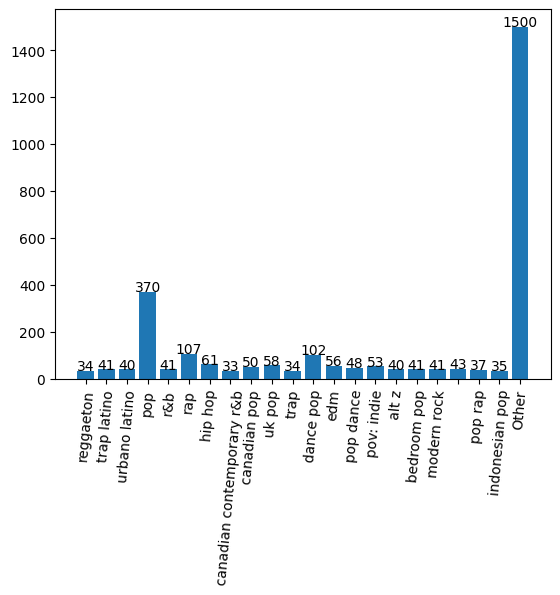

In [13]:
# Genre Count Bar Chart

import matplotlib.pyplot as plt

# Assuming 'data' is your dictionary

# Filter the data to include values greater than 50 and sum up the remaining values
filtered_data = {key: value for key, value in genreDict.items() if value > 30}
other_value = sum(value for value in genreDict.values() if value <= 30)

# Add the "Other" category and its summed up value to the filtered data
filtered_data['Other'] = other_value

# Extract the filtered keys and values
categories = list(filtered_data.keys())
values = list(filtered_data.values())

# Create a bar chart
plt.bar(categories, values)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=85)

# Add count labels on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 2, str(v), ha='center')

# Set labels and title
plt.show()

# Multiclass classification to predict Genre of the song
The way this classification works is that:

1. Essentially, the songs are registered with their artists on spotify. Spotify does not provide a genre database for each song. So with this multiclassification, we will use the artist genre as the **Target Value** of the Song's prediction in the latter.
2. Should the song have more than 1 artist which is registered with more than 1 genre, the song will be duped into several values, with different target values from each genre. This is to train the model to understand the scope of such genre better.

## Procedure
In this multiclass classification, we will use several algorithm: 
- Random Forest
- Gradient Boosting
- SVM

# Genre Divisions
As we can see from the output of the previous block, one row may have either **NO Genre** (not ideal), **one genre** (ideal), or more than one genre. In this function, we will make a duplicate of each song that has more than one genre and seperate it into multiple values with a unique genre.

In [14]:
def stringToList(stringValue):
    singularValue = stringValue

    singularValue = singularValue.replace('[', '').replace(']', '').replace('"', '').replace("'", "")
    singularValue = singularValue.split(', ')

    return singularValue

In [15]:
stringToList(str(main_df.iloc[:1, 2].values.tolist()))

['reggaeton', 'trap latino', 'urbano latino']

In [16]:
aaa = main_df[:1].copy()

In [17]:
import pandas as pd

new_df = []
noGenreCount = 0
abcd = []

# Convert DataFrame rows to a list
rows_as_list = main_df.values.tolist()
# print(rows_as_list[0])

# Print the list of rows
for i in rows_as_list:
    if len(stringToList(i[2])) >= 1:
        for _genre in stringToList(i[2]):
            print(i)
            # abcd.append(_genre)

    else:
        # No genre
        noGenreCount += 1

['7ro0hRteUMfnOioTFI5TG1', 'WHERE SHE GOES', "['reggaeton', 'trap latino', 'urbano latino']", 91, 0.652, 0.8, 9, -4.019, 0, 0.0614, 0.143, 0.629, 0.112, 0.234, 143.978, 'audio_features', '7ro0hRteUMfnOioTFI5TG1', 'spotify:track:7ro0hRteUMfnOioTFI5TG1', 'https://api.spotify.com/v1/tracks/7ro0hRteUMfnOioTFI5TG1', 'https://api.spotify.com/v1/audio-analysis/7ro0hRteUMfnOioTFI5TG1', 231704, 4]
['7ro0hRteUMfnOioTFI5TG1', 'WHERE SHE GOES', "['reggaeton', 'trap latino', 'urbano latino']", 91, 0.652, 0.8, 9, -4.019, 0, 0.0614, 0.143, 0.629, 0.112, 0.234, 143.978, 'audio_features', '7ro0hRteUMfnOioTFI5TG1', 'spotify:track:7ro0hRteUMfnOioTFI5TG1', 'https://api.spotify.com/v1/tracks/7ro0hRteUMfnOioTFI5TG1', 'https://api.spotify.com/v1/audio-analysis/7ro0hRteUMfnOioTFI5TG1', 231704, 4]
['7ro0hRteUMfnOioTFI5TG1', 'WHERE SHE GOES', "['reggaeton', 'trap latino', 'urbano latino']", 91, 0.652, 0.8, 9, -4.019, 0, 0.0614, 0.143, 0.629, 0.112, 0.234, 143.978, 'audio_features', '7ro0hRteUMfnOioTFI5TG1', 'sp

In [18]:
import ast

df_testing = pd.DataFrame(rows_as_list, columns=['songID', 'songTitle', 'SongArtistTitle', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
 
df_testing['SongArtistTitle'] = df_testing['SongArtistTitle'].apply(ast.literal_eval)
df_testing = df_testing.explode('SongArtistTitle')

df_testing = df_testing.reset_index(drop=True)

In [19]:
import csv

csv_file_path = 'database/seperateGenreOutput.csv'

df_testing.to_csv(csv_file_path, index=False)

### Genre Division Measurements

In [20]:
# DF Testing is the Dataframe that contains the singular value for the Genres
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865 entries, 0 to 2864
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   songID            2865 non-null   object 
 1   songTitle         2865 non-null   object 
 2   SongArtistTitle   2822 non-null   object 
 3   popularity        2865 non-null   int64  
 4   danceability      2865 non-null   float64
 5   energy            2865 non-null   float64
 6   key               2865 non-null   int64  
 7   loudness          2865 non-null   float64
 8   mode              2865 non-null   int64  
 9   speechiness       2865 non-null   float64
 10  acousticness      2865 non-null   float64
 11  instrumentalness  2865 non-null   float64
 12  liveness          2865 non-null   float64
 13  valence           2865 non-null   float64
 14  tempo             2865 non-null   float64
 15  type              2865 non-null   object 
 16  id                2865 non-null   object 


In [21]:
# Returning the count of songs that belongs to a Genre
count_by_value = df_testing['SongArtistTitle'].value_counts()

values_greater_than_10 = count_by_value[count_by_value > 10]

print(values_greater_than_10)

pop                          370
rap                          107
dance pop                    102
hip hop                       61
uk pop                        58
edm                           56
pov: indie                    53
canadian pop                  50
pop dance                     48
trap latino                   41
r&b                           41
modern rock                   41
bedroom pop                   41
alt z                         40
urbano latino                 40
pop rap                       37
indonesian pop                35
reggaeton                     34
trap                          34
canadian contemporary r&b     33
melodic rap                   30
chill r&b                     29
indietronica                  26
rock                          26
tropical house                26
uk dance                      26
j-pop                         24
urban contemporary            22
indie pop                     21
atl hip hop                   21
house     

# Genre Prediction

In [22]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865 entries, 0 to 2864
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   songID            2865 non-null   object 
 1   songTitle         2865 non-null   object 
 2   SongArtistTitle   2822 non-null   object 
 3   popularity        2865 non-null   int64  
 4   danceability      2865 non-null   float64
 5   energy            2865 non-null   float64
 6   key               2865 non-null   int64  
 7   loudness          2865 non-null   float64
 8   mode              2865 non-null   int64  
 9   speechiness       2865 non-null   float64
 10  acousticness      2865 non-null   float64
 11  instrumentalness  2865 non-null   float64
 12  liveness          2865 non-null   float64
 13  valence           2865 non-null   float64
 14  tempo             2865 non-null   float64
 15  type              2865 non-null   object 
 16  id                2865 non-null   object 


*Note: From these data, we can see that the numerical values that are important and are calculable are as such: popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, isntrumentalness, liveness, valence, tempo, duration, and time signature*

In [23]:
# Data cleaning

import pandas as pd
# Count the number of rows with NaN values in the entire DataFrame
nan_rows_count = df_testing.isna().any(axis=1).sum()

# Print the count
print("Number of rows with NaN values:", nan_rows_count)


Number of rows with NaN values: 43


In [24]:
import pandas as pd

# Assuming your DataFrame is called 'df'

# Remove rows with NaN values
df_testing = df_testing.dropna()

nan_rows_count = df_testing.isna().any(axis=1).sum()

# Print the count
print("Number of rows with NaN values:", nan_rows_count)

Number of rows with NaN values: 0


In [25]:
# Features
X_values = df_testing.iloc[:, 3:15].join(df_testing.iloc[:, 20:])

# Target Space
y_value = df_testing.iloc[:, 2]


In [26]:
# Splitting the data
from sklearn.model_selection import train_test_split

# Assuming you have your feature matrix X and corresponding labels y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_values, y_value, test_size=0.3, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test are the feature matrices, and y_train, y_test are the corresponding class labels

rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.05076741440377804


In [28]:
from sklearn.neighbors import KNeighborsClassifier

def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

Accuracy KNN : 0.07674 



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")